### Equation for Linear Regression

In a linear regression model with one feature (simple linear regression), the goal is to find the best-fit line:

𝑦 = 𝑤𝑋 + 𝑏
Where:

X is the independent variable.
y is the dependent variable.
w is the slope (weight).
b is the intercept (bias).


Estimating the Parameters 
𝑤 and 𝑏

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - y_{\text{pred}, i})^2

$$

Weight and bias update
$$
w \leftarrow w - \alpha \cdot \frac{\partial \text{MSE}}{\partial w}
$$
$$ 
b \leftarrow b - \alpha \cdot \frac{\partial \text{MSE}}{\partial b}


$$

In [2]:
import numpy as np

# Creating dataset

np.random.seed(42)
X = np.random.rand(100,1) * 10
print(X.shape)
print(X[:10])

# y = 2x + 3 + noise

y = 2 * X + 3 + np.random.randn(100,1) * 2
print(y.shape)
print(y[:10])

(100, 1)
[[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]
 [1.5599452 ]
 [0.58083612]
 [8.66176146]
 [6.01115012]
 [7.08072578]]
(100, 1)
[[10.66489651]
 [21.41627143]
 [17.82340039]
 [10.99803185]
 [ 5.68102903]
 [ 6.83411555]
 [ 7.11746033]
 [19.28698248]
 [13.40531303]
 [16.15793747]]


In [7]:

class LinearRegression:

    def __init__(self, lr = 0.01, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.w = 0
        self.b = 0
    
    def predict(self,X):
        return self.w * X + self.b

    def fit(self, X, y):
        n = len(X)
        for i in range(self.epochs):
            y_pred = self.predict(X)

            dw = - (2/n) * np.sum((y - y_pred) * X)
            db = - (2/n) * np.sum((y - y_pred))

            self.w -= self.lr * dw
            self.b -= self.lr * db

            if i % 100 == 0:
                loss = np.mean((y - y_pred)** 2)
                print(f"Epoch {i}, Loss: {loss:.4f}, w: {self.w:.4f}, b: {self.b:.4f}")


In [8]:
regressor = LinearRegression()
regressor.fit(X,y)

Epoch 0, Loss: 188.9198, w: 1.5005, b: 0.2480
Epoch 100, Loss: 4.1028, w: 2.1766, b: 1.6828
Epoch 200, Loss: 3.5145, w: 2.0620, b: 2.4283
Epoch 300, Loss: 3.3211, w: 1.9963, b: 2.8557
Epoch 400, Loss: 3.2575, w: 1.9587, b: 3.1008
Epoch 500, Loss: 3.2366, w: 1.9371, b: 3.2413
Epoch 600, Loss: 3.2297, w: 1.9247, b: 3.3219
Epoch 700, Loss: 3.2274, w: 1.9176, b: 3.3681
Epoch 800, Loss: 3.2267, w: 1.9135, b: 3.3946
Epoch 900, Loss: 3.2265, w: 1.9112, b: 3.4098


In [10]:
y_pred = regressor.predict(X)

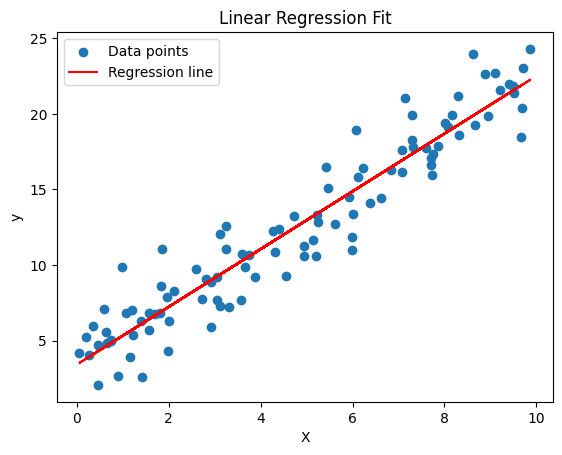

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()